In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re
import wordcloud
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# importing the dataset
df = pd.read_csv('spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename({'v1':'Label','v2':'Message'}, axis=1, inplace=True)

In [9]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Message'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [11]:
df['Label'].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: Label, dtype: float64

<AxesSubplot:xlabel='Label', ylabel='count'>

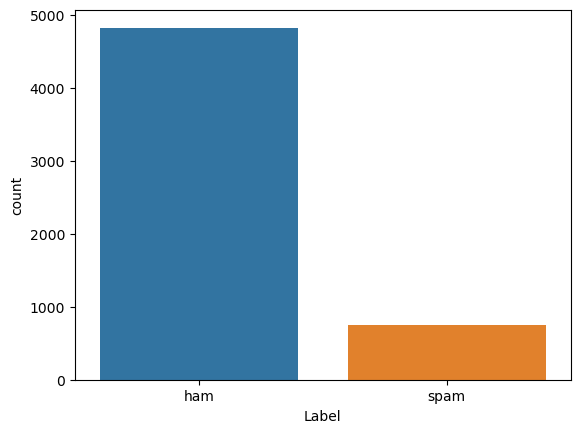

In [12]:
sns.countplot(x='Label',data=df)

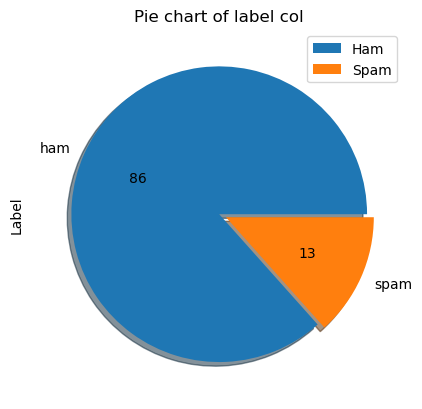

In [13]:
df['Label'].value_counts().plot(kind='pie', explode=[0,0.05],shadow='True',autopct='%d')
plt.title('Pie chart of label col')
plt.legend(['Ham','Spam'])
plt.show()

# Wordcloud

In [14]:
ham_msg = df[df['Label']=='ham'].copy()
spam_msg = df[df['Label']=='spam'].copy()

In [15]:
spam_msg['Message'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [16]:
def show_wordcloud(df):
    text = ' '.join(df['Message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    x = wordcloud.WordCloud(stopwords=stopwords, background_color='black',colormap='coolwarm',width=800, height=600).generate(text)
    plt.figure(figsize=(15,7))
    plt.imshow(x)
    plt.show()

In [17]:
len(set(wordcloud.STOPWORDS))

192

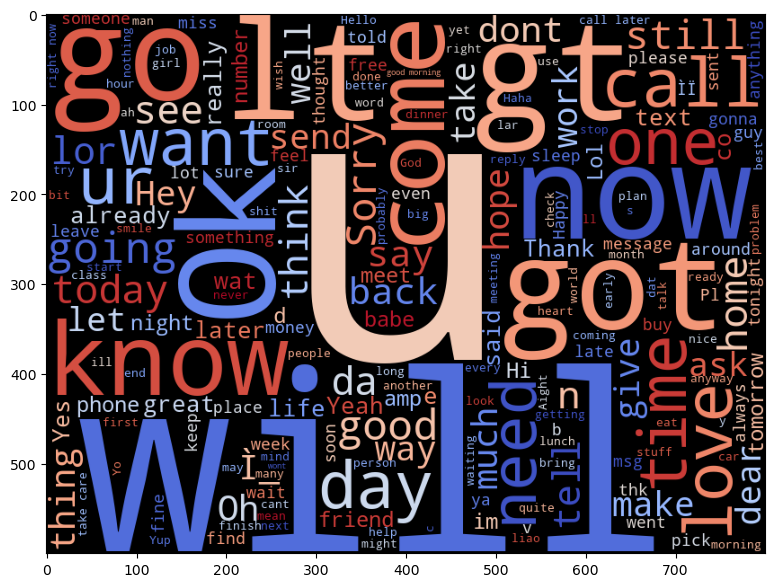

In [18]:
show_wordcloud(ham_msg)

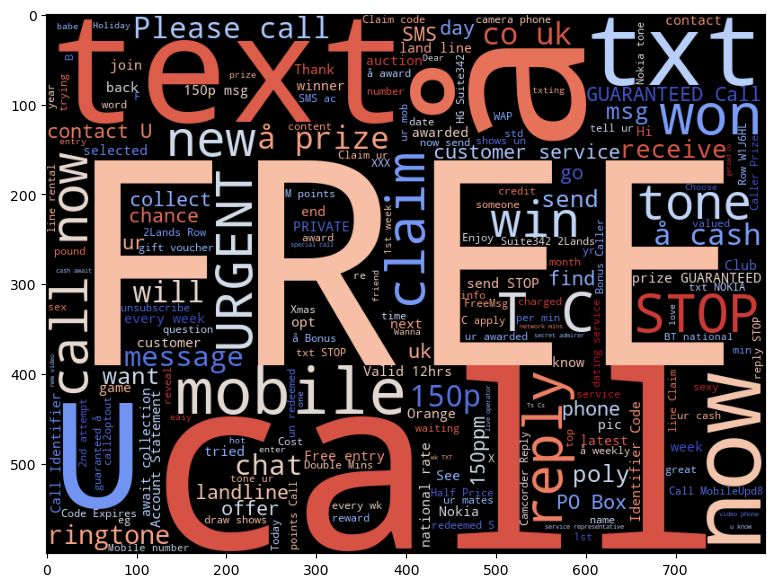

In [19]:
show_wordcloud(spam_msg)

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Cleaning and Preprocessing

In [22]:
wl = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    msg = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    msg = msg.lower()
    msg = msg.split()
    
    msg = [wl.lemmatize(word) for word in msg if not word in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [23]:
##stopwords.words('bengali')

In [40]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# Word Embedding

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(df['Label'])
y = y.iloc[:,1].values

In [26]:
X.size

39121012

In [27]:
X.shape

(5572, 7021)

In [28]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Train -Test Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training model using Naive Bayes Classifier

In [30]:
model = MultinomialNB().fit(x_train,y_train)

# Predict

In [31]:
y_pred = model.predict(x_test)

In [32]:
cm = confusion_matrix(y_test,y_pred)

In [33]:
print(cm)

[[933  16]
 [  6 160]]


In [34]:
16+6+933+160

1115

In [35]:
accuracy_score(y_test,y_pred)*100

98.02690582959642

In [36]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.91      0.96      0.94       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### User_Input Detection

In [46]:
# Initialize the WordNetLemmatizer
wl = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize the message into words
    words = text.split()

    # Lemmatize the words and remove stopwords
    words = [wl.lemmatize(word) for word in words if not word in stopwords.words('english')]

    # Join the preprocessed words back into a single string
    text = ' '.join(words)

    return text

# Preprocess the data
X_preprocessed = [preprocess_text(text) for text in X]

# Initialize and fit the TfidfVectorizer on the preprocessed data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_features = tfidf_vectorizer.fit_transform(X_preprocessed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Function for spam detection
def detect_spam(message, model, vectorizer):
    # Preprocess the user input message
    preprocessed_message = preprocess_text(message)

    # Transform the preprocessed message using the provided vectorizer
    input_data_features = vectorizer.transform([preprocessed_message])

    # Make predictions using the provided model
    prediction = model.predict(input_data_features)

    # Display the prediction result
    if prediction[0] == "ham":
        print("The message is ham.")
    else:
        print("The message is spam.")

# Take user input
user_input = input("Enter your message: ")

# Call the spam detection function with the trained model and vectorizer
detect_spam(user_input, model, tfidf_vectorizer)


Enter your message:  hello


The message is ham.
